In [1]:
import matplotlib.pyplot as plt
import os
from skimage.io import imread
import pandas as pd
import numpy as np
import cv2

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications import VGG16
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.layers import Dense, GlobalAveragePooling2D


In [101]:
all_dir='C:/Users/User/Downloads/NIA_Task1_M1'
base_dir='C:/Users/User/Downloads/base'


train_dir = os.path.join(base_dir,'train')


vaild_dir = os.path.join(base_dir,'vaild')

test_dir = os.path.join(base_dir,'test')

############################################
train_m0_dir = os.path.join(train_dir,'m0')


train_m1_dir = os.path.join(train_dir,'m1')


val_m0_dir = os.path.join(vaild_dir,'m0')


val_m1_dir = os.path.join(vaild_dir,'m1')


test_m0_dir = os.path.join(test_dir,'m0')


test_m1_dir = os.path.join(test_dir,'m1')

#############################################

In [102]:
print(len(os.listdir(train_m0_dir)),len(os.listdir(train_m1_dir)))

print(len(os.listdir(val_m0_dir)),len(os.listdir(val_m1_dir)))

print(len(os.listdir(test_m0_dir)),len(os.listdir(test_m1_dir)))

447 309
151 102
147 101


In [105]:
os.listdir(train_m1_dir)

['tm1_0.png',
 'tm1_1.png',
 'tm1_10.png',
 'tm1_100.png',
 'tm1_101.png',
 'tm1_102.png',
 'tm1_103.png',
 'tm1_104.png',
 'tm1_105.png',
 'tm1_106.png',
 'tm1_107.png',
 'tm1_108.png',
 'tm1_109.png',
 'tm1_11.png',
 'tm1_110.png',
 'tm1_111.png',
 'tm1_112.png',
 'tm1_113.png',
 'tm1_114.png',
 'tm1_115.png',
 'tm1_116.png',
 'tm1_117.png',
 'tm1_118.png',
 'tm1_119.png',
 'tm1_12.png',
 'tm1_120.png',
 'tm1_121.png',
 'tm1_122.png',
 'tm1_123.png',
 'tm1_124.png',
 'tm1_125.png',
 'tm1_126.png',
 'tm1_127.png',
 'tm1_128.png',
 'tm1_129.png',
 'tm1_13.png',
 'tm1_130.png',
 'tm1_131.png',
 'tm1_132.png',
 'tm1_133.png',
 'tm1_134.png',
 'tm1_135.png',
 'tm1_136.png',
 'tm1_137.png',
 'tm1_138.png',
 'tm1_139.png',
 'tm1_14.png',
 'tm1_140.png',
 'tm1_141.png',
 'tm1_142.png',
 'tm1_143.png',
 'tm1_144.png',
 'tm1_145.png',
 'tm1_146.png',
 'tm1_147.png',
 'tm1_148.png',
 'tm1_149.png',
 'tm1_15.png',
 'tm1_150.png',
 'tm1_151.png',
 'tm1_152.png',
 'tm1_153.png',
 'tm1_154.png',
 '

In [148]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=4,
                                   horizontal_flip=True,
                                   vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                   target_size=None,
                                                    label_mode="int",
                                                    batch_size=20,
                                                    interpolation="nearest",
                                                    shuffle=True
                                                    class_mode='binary'
                                                   )
validation_generator = test_datagen.flow_from_directory(directory=vaild_dir,
                                                        target_size=None,
                                                        label_mode="int",
                                                        batch_size=20,
                                                        interpolation="nearest",
                                                        shuffle=True
                                                        class_mode='binary'
                                                       )

Found 756 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [107]:
print(train_generator.class_indices)

{'m0': 0, 'm1': 1}


In [137]:
for x_data, t_data in train_generator:
    print('x_data의 shape : {}'.format(x_data.shape))
    print('t_data의 shape : {}'.format(t_data.shape))
    i += 1
    if i > 4 : # 여기서 지정해준 만큼 이미지를 생성합니다.
        break


x_data의 shape : (20, 512, 512, 3)
t_data의 shape : (20,)


In [129]:
plt.imshow(t_data[1])

IndexError: index 100 is out of bounds for axis 0 with size 20

In [139]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

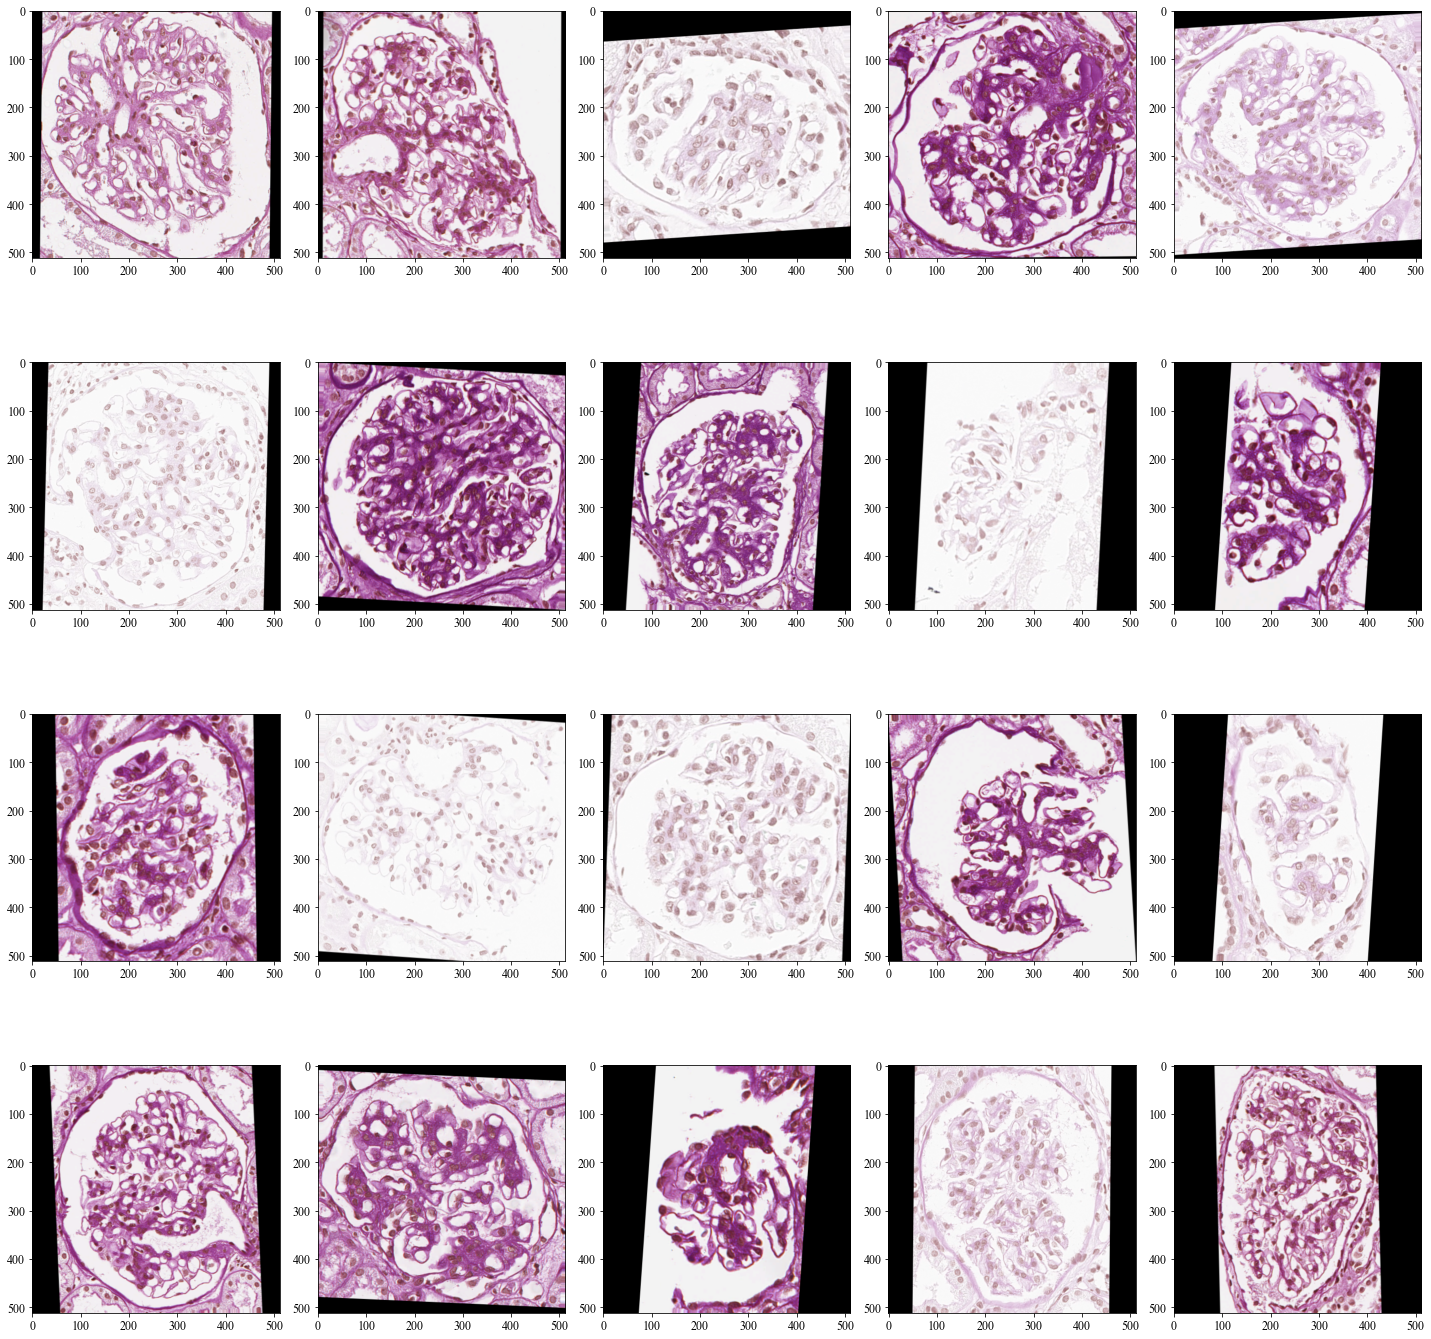

In [141]:
fig = plt.figure(figsize=(20,20))   
ax = list()

for i in range(20):
    ax.append(fig.add_subplot(4,5,i+1))  # subplot을 20개 만들어서 4행 5열 list에 저장
    
# train_generator로부터 x_data와 t_data를 뽑아요.
for x_data, t_data in train_generator:
    
    for idx, img_data in enumerate(x_data):
        ax[idx].imshow(img_data)
    
    break     # break하면 한 번만!!
                # enumerate 맨 앞이 index로 빠지고 나머지 data가 이미지 data로 빠져요
    
plt.tight_layout()
plt.show()

In [149]:
test_generator = test_datagen.flow_from_directory(directory=test_dir,target_size=(512,512),batch_size=20,class_mode='binary')

Found 248 images belonging to 2 classes.


In [ ]:
for batch in train_datagen.flow(sample, batch_size=1, save_to_dir='./example', save_prefix='example', save_format='jpg'):
    i += 1
    if i > 10: # 여기서 지정해준 만큼 이미지를 생성합니다.
        break

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
def datagen(path):

    datagen = ImageDataGenerator(rotation_range=50,
                                 width_shift_range=0.3,
                                 height_shift_range=0.3,
                                 brightness_range=(0.0, 0.9),
                                 shear_range=0.5,
                                 zoom_range=0.5,
                                 horizontal_flip=True,
                                 vertical_flip=True)
                                 

    load_sample = load_img(path)
    sample = img_to_array(load_sample)
    sample = sample.reshape((1,) + sample.shape)
    i=0
    for batch in datagen.flow(sample, batch_size=1, save_to_dir='./example', save_prefix='example', save_format='jpg'):
        i += 1
        if i > 10: # 여기서 지정해준 만큼 이미지를 생성합니다.
            break

In [155]:
import cv2
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications import VGG16
from keras.layers import Dense, GlobalAveragePooling2D
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

vgg16_model =VGG16(weights ='imagenet',include_top=False,input_shape = (512,512,3))



        
last = vgg16_model.output
x = global_average_layer(last)
# x = Flatten()(last)
x = Dropout(0.5)(x)
# x = Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
pred = Dense(1, activation='sigmoid')(x)
# pred = prediction_layer(x)

for layer in vgg16_model.layers:
    layer.trainable = False
model_vgg = Model(vgg16_model.input,pred)


      
model_vgg.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0  

C:\Users\User\AppData\Local\Temp/ipykernel_6064/4019151085.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_vgg.fit_generator(train_generator,steps_per_epoch=38,epochs=30,validation_data=validation_generator,validation_steps=12)


Epoch 1/30
38/38 [==============================] - 695s 18s/step - loss: 0.8391 - acc: 0.5317 - val_loss: 2.1929 - val_acc: 0.5958
Epoch 2/30
38/38 [==============================] - 680s 18s/step - loss: 0.7593 - acc: 0.5450 - val_loss: 1.0541 - val_acc: 0.5708
Epoch 3/30
38/38 [==============================] - 697s 18s/step - loss: 0.7196 - acc: 0.5939 - val_loss: 1.2559 - val_acc: 0.5583
Epoch 4/30
38/38 [==============================] - 716s 19s/step - loss: 0.7112 - acc: 0.5966 - val_loss: 1.2212 - val_acc: 0.5500
Epoch 5/30
38/38 [==============================] - 714s 19s/step - loss: 0.6968 - acc: 0.5807 - val_loss: 1.1941 - val_acc: 0.5375
Epoch 6/30
38/38 [==============================] - 702s 19s/step - loss: 0.6721 - acc: 0.6151 - val_loss: 2.7336 - val_acc: 0.5708
Epoch 7/30
38/38 [==============================] - 677s 18s/step - loss: 0.6831 - acc: 0.5820 - val_loss: 3.9467 - val_acc: 0.5875
Epoch 8/30
38/38 [==============================] - 707s 19s/step - loss: 0.

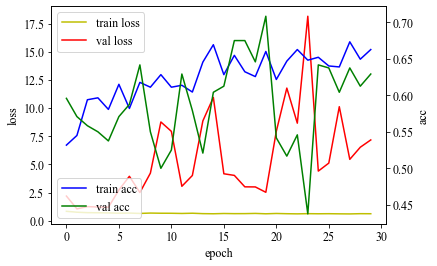

In [156]:
# build the model
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_vgg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# # fix random seed for reproductibility
# seed = 7
# np.random.seed(seed)
# tf.random.set_seed(seed)

# FIT THE MODEL - OPTIMIZATION
hist = model_vgg.fit_generator(train_generator,steps_per_epoch=38,epochs=30,validation_data=validation_generator,validation_steps=13)
model_vgg.save('model_vgg_dg.h5')

# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('acc')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [95]:
print("-- Evaluate --")
scores = model_vgg.evaluate_generator(test_generator)
# scores = model_vgg.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model_vgg.metrics_names[1], scores[1]*100))

-- Evaluate --


C:\Users\User\AppData\Local\Temp/ipykernel_6064/3284518700.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_vgg.evaluate_generator(test_generator)


acc: 59.68%


In [87]:
print("-- Predict --")
output = model_vgg.predict_generator(test_generator)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --


C:\Users\User\AppData\Local\Temp/ipykernel_6064/2627964972.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  output = model_vgg.predict_generator(test_generator)


{'m0': 0, 'm1': 1}
[[0.000]
 [0.000]
 [0.989]
 [0.000]
 [0.000]
 [0.999]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [0.000]
 [0.000]
 [0.000]
 [1.000]
 [0.000]
 [0.000]
 [1.000]
 [0.000]
 [0.000]
 [1.000]
 [0.000]
 [0.000]
 [0.000]
 [0.994]
 [1.000]
 [1.000]
 [0.000]
 [1.000]
 [0.000]
 [1.000]
 [0.000]
 [0.000]
 [1.000]
 [1.000]
 [1.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [1.000]
 [1.000]
 [0.000]
 [1.000]
 [1.000]
 [0.000]
 [0.920]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [1.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.971]
 [1.000]
 [1.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [1.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.096]
 [0.485]
 [0.000]
 [0.000]
 [1.000]
 [0.000]
 [0.000]
 [0.000]
 [1.000]
 [0.000]
 [0.000]
 [1.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.251]
 [0.000]
 [0.000]
 [0.016]
 [0.000]
 [0.000]
 [0.000]
 [0.000]
 [0.992]
 [0.000]
 [1.000]
 [0.978]
 [0.000]
 [0.000]
 [0.000]
 [1.000]
 [0.000]


In [69]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
y_pred= model_vgg.predict(test_generator)

# y_pred1 = np.argmax(y_pred, axis=1)
# y_pred.shape

array([[0.000],
       [0.000],
       [0.977],
       [0.000],
       [0.000],
       [0.000],
       [1.000],
       [0.000],
       [0.000],
       [0.485],
       [0.000],
       [1.000],
       [1.000],
       [0.999],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [0.096],
       [0.000],
       [0.108],
       [1.000],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [1.000],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [1.000],
       [0.000],
       [1.000],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [1.000],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [1.000],
       [1.000],
       [0.920],
       [0.000],
       [0.000],
       [0.000],
       [0.000],
       [1.000],
       [0.000],
       [

In [71]:
y_true = test_generator.classes

In [74]:
probabilities = model_vgg.predict_generator(generator=test_generator)

C:\Users\User\AppData\Local\Temp/ipykernel_6064/3884413431.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  probabilities = model_vgg.predict_generator(generator=test_generator)


In [75]:
y_pred = probabilities > 0.5

In [90]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [89]:
y_pred

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [

In [79]:
font = {
'family': 'Times New Roman',
'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true, y_pred)
# plot_confusion_matrix(conf_mat=mat, figsize=(8, 8), show_normed=False)

In [80]:
mat

array([[105,  42],
       [ 78,  23]], dtype=int64)

<AxesSubplot:>

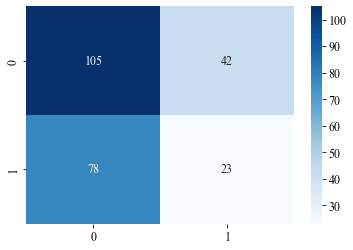

In [82]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(mat, annot=True, 
            fmt='d', cmap='Blues')

In [85]:
print(classification_report(y_true, y_pred, target_names=['M0', 'M1']))

              precision    recall  f1-score   support

          M0       0.57      0.71      0.64       147
          M1       0.35      0.23      0.28       101

    accuracy                           0.52       248
   macro avg       0.46      0.47      0.46       248
weighted avg       0.48      0.52      0.49       248



In [ ]:
from sklearn.cluster import KMeans

# compare grad and faster-grad
def show_result(model, model_small, layer_name, data, no, kmeans, channel_weight, channel_adress, top50=False):
    original, result_grad, result_faster, time0, time1 = [], [], [], [], []
    for i in range(5):
        original.append(data[no[i]]) 
        img0, _, time_0 = GradCam(model, data[no[i]], layer_name, 1, top50)
        img1, time_1 = predict_faster_gradcam(data[no[i]], model_small, kmeans, channel_weight, channel_adress)
        result_grad.append(img0)
        result_faster.append(img1)
        time0.append(time_0)
        time1.append(time_1)

    plt.figure(figsize=(15,10))
    for i in range(5):
        plt.subplot(3,5,i+1)
        plt.axis("off")
        if i == 0:
            plt.title("original")
        plt.imshow(original[i])
    for i in range(5):
        plt.subplot(3,5,i+6)
        plt.axis("off")
        if i == 0:
            time_ = int(np.mean(time1)*1000)
            plt.title("Faster-Grad-CAM \n(%d msec)" % time_)
        plt.imshow(array_to_img(result_faster[i]))
    for i in range(5):
        plt.subplot(3,5,i+11)
        plt.axis("off")
        if i == 0:
            time_ = int(np.mean(time0)*1000)
            plt.title("Grad-CAM \n(%d msec)" % time_)
        plt.imshow(array_to_img(result_grad[i]))
    plt.show()

def train_faster_gradcam(x_normal, x_anomaly, model, clusters=10):
    # Arcfaceを削除
    model_embed = Model(model.get_layer(index=0).input, [model.layers[-13].get_output_at(-1), model.layers[-4].get_output_at(-1)])

    # pa class data
    _, vector_normal = model_embed.predict(x_normal)

    # gu class data
    _, vector_anomaly = model_embed.predict(x_anomaly)# shape[(len(x), 3, 3, 480), (len(x), 1280)]

    # k-means
    kmeans = KMeans(n_clusters=clusters, random_state=0).fit(vector_anomaly)
    labels = kmeans.labels_

    # channel database
    channel_weight, channel_adress = [], []
    temp_weight = np.zeros((clusters, 480))# 480="block_16_expand_relu".output
    print("Making Database...")
    for i in range(len(labels)):
        # x_anomalyについて一個ずつ重みを加算していく
        _, weight, _ = GradCam(model, x_anomaly[i], "block_16_expand_relu", 1, False)
        temp_weight[labels[i]] += weight #要確認
        print(i+1,"/",len(labels))

    for i in range(clusters):
        number = np.where(labels == i, 1, 0) #クラスタ内の個数
        average_weight = temp_weight[i] / np.sum(number) #重みの平均
        weight_adress = np.argsort(average_weight)
        channel_adress.append(weight_adress[-50:])
        channel_weight.append(average_weight[weight_adress[-50:]])

    return model_embed, kmeans, np.array(channel_weight), np.array(channel_adress), vector_normal

def predict_faster_gradcam(x, model, kmeans, channel_weight, channel_adress):
    before = time.time()
    channel_out, vector = model.predict(np.expand_dims(x, axis=0))
    channel_out = channel_out[0]
    cluster_no = kmeans.predict(vector)
    # レイヤーのアウトプットに乗じる
    cam = np.dot(channel_out[:,:,channel_adress[cluster_no][0]], channel_weight[cluster_no][0])

    # ヒートマップにして合成
    cam = cv2.resize(cam, (x.shape[1], x.shape[0]), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    
    jetcam = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)  # モノクロ画像に疑似的に色をつける
    jetcam = cv2.cvtColor(jetcam, cv2.COLOR_BGR2RGB)  # 色をRGBに変換
    jetcam = (np.float32(jetcam) + x*255 / 2)   # もとの画像に合成

    return jetcam, time.time()-before

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()